# Pasos inicialies

In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [416]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 10)
colores = cmap(saltos)

Voy hacer un analisis del procentaje ganado por cada año 

In [417]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


# Conversion a dolar

In [418]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

In [419]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

In [420]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

In [421]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

# Porcentaje de ganados



Me quedo con las columnas de la fecha en que fue creado la oportunidad, y la etapa.

In [422]:
stages_per_date = entrenamiento.loc[:,['Opportunity_Created_Date','Stage']]
stages_per_date['Opportunity_Created_Date'] = pd.to_datetime(stages_per_date['Opportunity_Created_Date'], errors='coerce')
stages_per_date

,Opportunity_Created_Date,Stage
0,2015-12-07,Closed Lost
1,2015-12-07,Closed Won
2,2015-12-08,Closed Won
3,2015-12-08,Closed Lost
4,2015-12-08,Closed Lost
...,...,...
16942,2015-12-04,Closed Won
16943,2015-12-04,Closed Won
16944,2015-12-04,Closed Won
16945,2015-12-05,Closed Lost


Me quedo solo con el año de la fecha, agrupo por el año y etapa, y realizo un conteo de las distintas etapas en cada año

In [423]:
stages_per_date['Year'] = stages_per_date['Opportunity_Created_Date'].dt.year
stages_per_year = stages_per_date.groupby(['Year','Stage']).agg({'Stage':'count'})
stages_per_year

Stage
Year Stage               
2013 Closed Lost        1
2014 Closed Lost       23
     Closed Won        17
2015 Closed Lost      736
     Closed Won       276
2016 Closed Lost     2257
     Closed Won      2098
2017 Closed Lost     2551
     Closed Won      4369
     Proposal           1
2018 Closed Lost     1782
     Closed Won      2773
     Negotiation       18
     Proposal          34
     Qualification     11

Acomodo el dataframe asi quedo mas amigable a la vista.

In [424]:
stages_per_year = stages_per_year.unstack()
stages_per_year


Stage                                              
Stage Closed Lost Closed Won Negotiation Proposal Qualification
Year                                                           
2013          1.0        NaN         NaN      NaN           NaN
2014         23.0       17.0         NaN      NaN           NaN
2015        736.0      276.0         NaN      NaN           NaN
2016       2257.0     2098.0         NaN      NaN           NaN
2017       2551.0     4369.0         NaN      1.0           NaN
2018       1782.0     2773.0        18.0     34.0          11.0

Solamente me interesan las columnas Closed_lost y Closed_won, ya que me interesa saber el porcentaje de las oportunidades ya finalizadas.

In [425]:
stages_per_year.columns = ['Closed_lost', 'Closed_won','Negotiation','Proposal','Qualification']
stages_per_year = stages_per_year.loc[:,['Closed_lost', 'Closed_won']]
stages_per_year

,Closed_lost,Closed_won
Year,,
2013,1.0,NaN
2014,23.0,17.0
2015,736.0,276.0
2016,2257.0,2098.0
2017,2551.0,4369.0
2018,1782.0,2773.0


En el 2013 parece que no hubo ningun caso ganado, por lo que hay un NaN, reemplazamos a este por 0 para poder operar, y calcular el porcentaje de oportunidades ganadas.

In [426]:
stages_per_year = stages_per_year.fillna(0)
stages_per_year['percent_won'] = stages_per_year['Closed_won']*100/(stages_per_year['Closed_lost'] + stages_per_year['Closed_won'])
percent_year = stages_per_year['percent_won']
percent_year

Year
2013     0.000000
2014    42.500000
2015    27.272727
2016    48.174512
2017    63.135838
2018    60.878156
Name: percent_won, dtype: float64

## Graficando

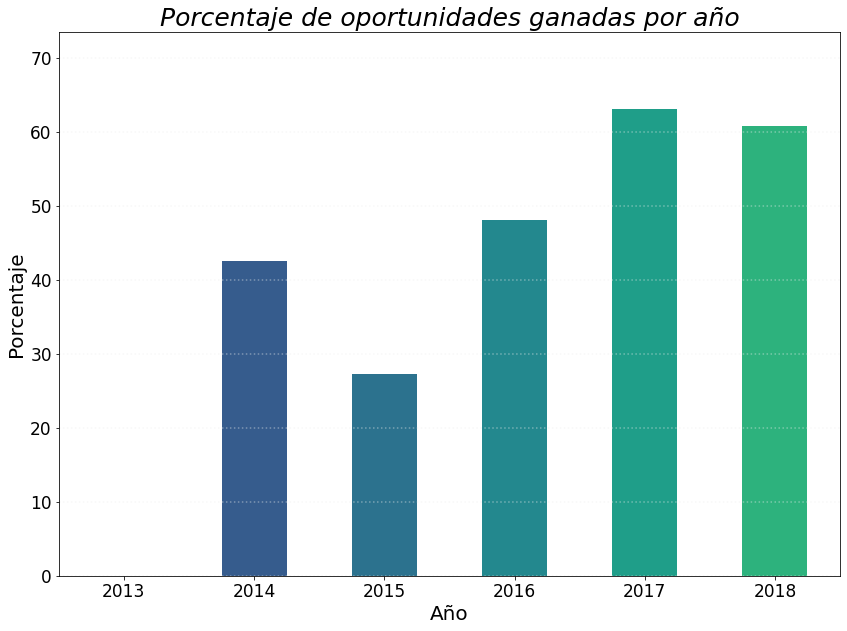

In [427]:
plt.title('Porcentaje de oportunidades ganadas por año', fontsize=25, fontstyle='oblique')
grafiquito = percent_year.plot(kind='bar', figsize=(14,10), rot=360, color=colores, fontsize=17)
ax = plt.gca()
ax.set_ylabel('Porcentaje',fontsize=20)
ax.set_xlabel('Año', fontsize=20)

lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

Podemos ver que el año con mas probabilidad de ser aceptado es el año 2017, aunque para el año 2013 resulta medio tramposo este grafico, ya que solo hubo una oportunidad, y esta fallo, por eso el 0% de ganados.

# Años con mayor monto


In [428]:
df = entrenamiento.loc[:,['Opportunity_Created_Date','Total_Amount','Stage', 'Region']]
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'], errors='coerce')
df

,Opportunity_Created_Date,Total_Amount,Stage,Region
0,2015-12-07,6169176.00,Closed Lost,EMEA
1,2015-12-07,56429.10,Closed Won,EMEA
2,2015-12-08,83865.60,Closed Won,Americas
3,2015-12-08,7421881.50,Closed Lost,Americas
4,2015-12-08,13357192.50,Closed Lost,Americas
...,...,...,...,...
16942,2015-12-04,120919.50,Closed Won,EMEA
16943,2015-12-04,108827.55,Closed Won,EMEA
16944,2015-12-04,120919.50,Closed Won,EMEA
16945,2015-12-05,2346796.88,Closed Lost,Americas


In [429]:
df['Year'] = df['Opportunity_Created_Date'].dt.year
del df['Opportunity_Created_Date']
df

,Total_Amount,Stage,Region,Year
0,6169176.00,Closed Lost,EMEA,2015
1,56429.10,Closed Won,EMEA,2015
2,83865.60,Closed Won,Americas,2015
3,7421881.50,Closed Lost,Americas,2015
4,13357192.50,Closed Lost,Americas,2015
...,...,...,...,...
16942,120919.50,Closed Won,EMEA,2015
16943,108827.55,Closed Won,EMEA,2015
16944,120919.50,Closed Won,EMEA,2015
16945,2346796.88,Closed Lost,Americas,2015


In [430]:
montos_anio = df.groupby('Year').agg({'Total_Amount':'sum'})
montos_anio.sort_values('Total_Amount')

,Total_Amount
Year,
2013,7.748764e+05
2014,9.547073e+07
2018,2.670374e+09
2015,2.834673e+09
2016,4.883884e+09
2017,6.527764e+09


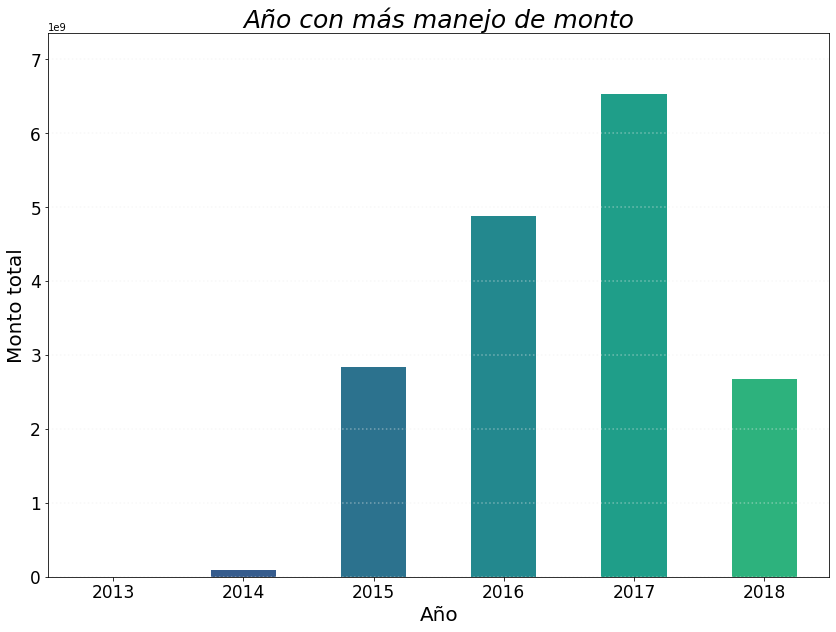

In [431]:
plt.title('Año con más manejo de monto', fontsize=25, fontstyle='oblique')
grafiquito = montos_anio['Total_Amount'].plot(kind='bar', figsize=(14,10), rot=360, color=colores, fontsize=17)
ax = plt.gca()
ax.set_ylabel('Monto total',fontsize=20)
ax.set_xlabel('Año', fontsize=20)

lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

In [432]:
oportunidades_anio = df.groupby('Year').agg({'Stage':'count'})
oportunidades_anio

,Stage
Year,
2013,1
2014,40
2015,1012
2016,4355
2017,6921
2018,4618


# Analizando 2017 y 2018

In [433]:
df2017 = df[ df['Year'] == 2017 ]
df2018 = df[ df['Year'] == 2018 ]
df_both = df[ (df['Year'] == 2018) | (df['Year'] == 2017) ]
print(df2017)
df2018

       Total_Amount        Stage    Region  Year
669      79606.8000   Closed Won      EMEA  2017
670      18370.4625   Closed Won      EMEA  2017
671      40306.5000   Closed Won      EMEA  2017
672     297492.9750   Closed Won      EMEA  2017
673     275721.4746   Closed Won      EMEA  2017
...             ...          ...       ...   ...
11481   189108.0000   Closed Won  Americas  2017
11482     1750.0000   Closed Won  Americas  2017
11483    75762.5000   Closed Won  Americas  2017
11484    26950.0000   Closed Won  Americas  2017
11485   557865.0000  Closed Lost  Americas  2017

[6921 rows x 4 columns]


,Total_Amount,Stage,Region,Year
11486,1900.000,Closed Lost,Americas,2018
11487,24735.000,Closed Lost,Americas,2018
11488,2900.000,Closed Won,Americas,2018
11489,61110.000,Closed Won,Americas,2018
11490,20900.000,Closed Lost,Americas,2018
...,...,...,...,...
16099,10289.664,Closed Won,Japan,2018
16100,309441.600,Closed Won,Americas,2018
16101,1198.530,Closed Won,Americas,2018
16102,5752.500,Closed Won,Americas,2018


In [434]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 6)
colores = cmap(saltos)

In [441]:
by_stage = df_both.groupby(['Year', 'Stage']).agg({'Total_Amount':'sum'})
by_stage

Total_Amount
Year Stage                      
2017 Closed Lost    5.964232e+09
     Closed Won     5.635305e+08
     Proposal       1.360000e+03
2018 Closed Lost    2.289488e+09
     Closed Won     3.179284e+08
     Negotiation    4.344111e+06
     Proposal       4.813619e+07
     Qualification  1.047807e+07

In [443]:
by_stage = by_stage.unstack()
by_stage

Total_Amount                                                      
Stage   Closed Lost    Closed Won Negotiation      Proposal Qualification
Year                                                                     
2017   5.964232e+09  5.635305e+08         NaN  1.360000e+03           NaN
2018   2.289488e+09  3.179284e+08  4344111.44  4.813619e+07  1.047807e+07

In [445]:
by_stage.columns = ['Closed Lost', 'Closed Won', 'Negotation','Proposal','Qualification']
by_stage = by_stage.loc[:,['Closed Lost', 'Closed Won']]
by_stage

,Closed Lost,Closed Won
Year,,
2017,5.964232e+09,5.635305e+08
2018,2.289488e+09,3.179284e+08


Text(0.5, 0, 'Año ')

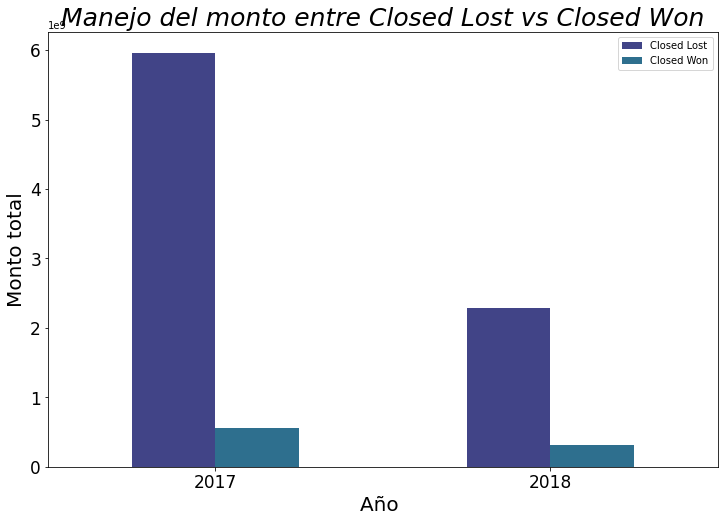

In [463]:
by_stage.plot(kind='bar', figsize=(12,8), rot=360, color=colores, fontsize=17)
plt.title('Manejo del monto entre Closed Lost vs Closed Won', fontsize=25, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Monto total',fontsize=20)
ax.set_xlabel('Año ', fontsize=20)


## 2017

### Monto

In [450]:
by_stage_2017 = df2017.groupby('Stage').agg({'Total_Amount':'sum'})
by_stage_2017

,Total_Amount
Stage,
Closed Lost,5.964232e+09
Closed Won,5.635305e+08
Proposal,1.360000e+03


In [451]:
by_stage_2017 = by_stage_2017.loc[(['Closed Lost', 'Closed Won'])]
by_stage_2017

,Total_Amount
Stage,
Closed Lost,5.964232e+09
Closed Won,5.635305e+08


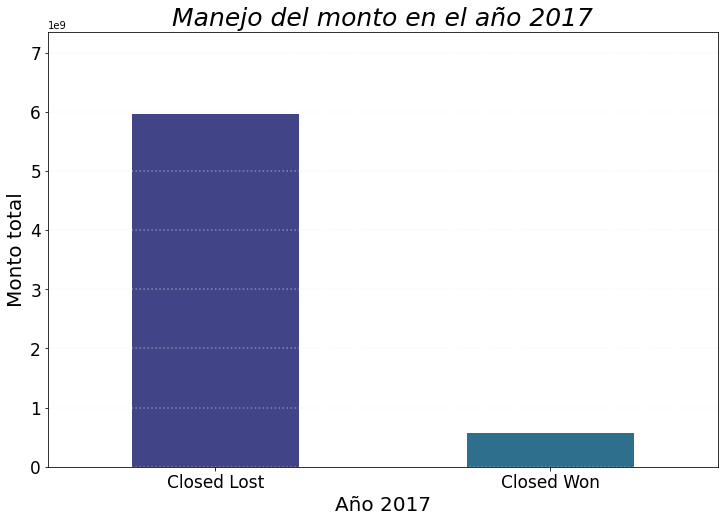

In [452]:
plt.title('Manejo del monto en el año 2017', fontsize=25, fontstyle='oblique')
grafiquito = by_stage_2017['Total_Amount'].plot(kind='bar', figsize=(12,8), rot=360, color=colores, fontsize=17)
ax = plt.gca()
ax.set_ylabel('Monto total',fontsize=20)
ax.set_xlabel('Año 2017', fontsize=20)

lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

### Region


In [454]:
by_region_2017 = df2017.groupby(['Region','Stage']).agg({'Stage':'count'})
by_region_2017 = by_region_2017.unstack()
by_region_2017.columns = ['Closed Lost', 'Closed Won', 'Proposal']
by_region_2017

,Closed Lost,Closed Won,Proposal
Region,,,
APAC,618.0,850.0,NaN
Americas,946.0,759.0,NaN
EMEA,725.0,1173.0,1.0
Japan,198.0,1567.0,NaN
Middle East,64.0,20.0,NaN


In [455]:
by_region_2017 = by_region_2017.loc[:,['Closed Lost', 'Closed Won']]
by_region_2017

,Closed Lost,Closed Won
Region,,
APAC,618.0,850.0
Americas,946.0,759.0
EMEA,725.0,1173.0
Japan,198.0,1567.0
Middle East,64.0,20.0


Text(0.5, 0, 'Region')

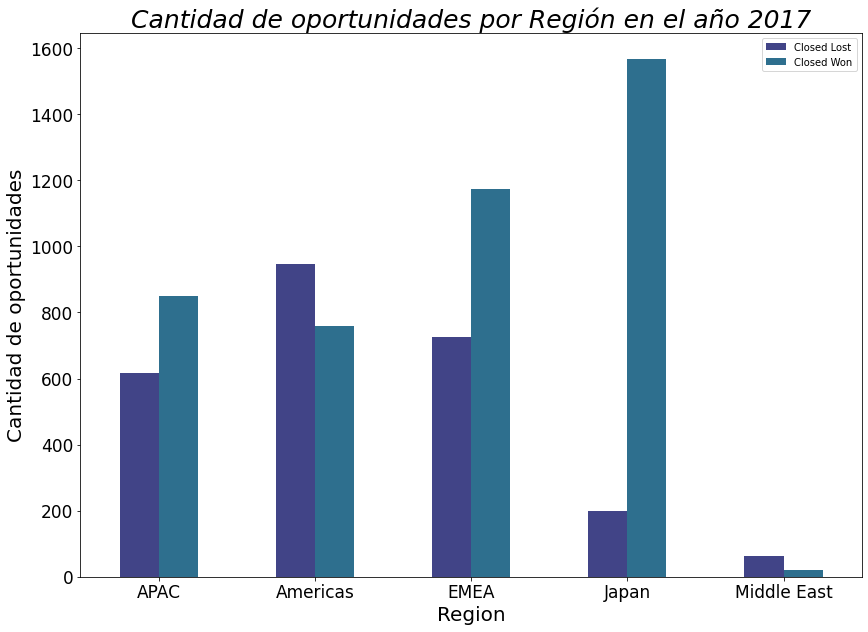

In [456]:
by_region_2017.plot(kind='bar', figsize=(14,10), rot=360, color=colores ,fontsize=17)
plt.title('Cantidad de oportunidades por Región en el año 2017', fontsize=25, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Cantidad de oportunidades',fontsize=20)
ax.set_xlabel('Region', fontsize=20)

## 2018

### Monto

In [464]:
by_stage_2018 = df2018.groupby('Stage').agg({'Total_Amount':'sum'})
by_stage_2018

,Total_Amount
Stage,
Closed Lost,2.289488e+09
Closed Won,3.179284e+08
Negotiation,4.344111e+06
Proposal,4.813619e+07
Qualification,1.047807e+07


In [465]:
by_stage_2018 = by_stage_2018.loc[(['Closed Lost', 'Closed Won'])]
by_stage_2018

,Total_Amount
Stage,
Closed Lost,2.289488e+09
Closed Won,3.179284e+08


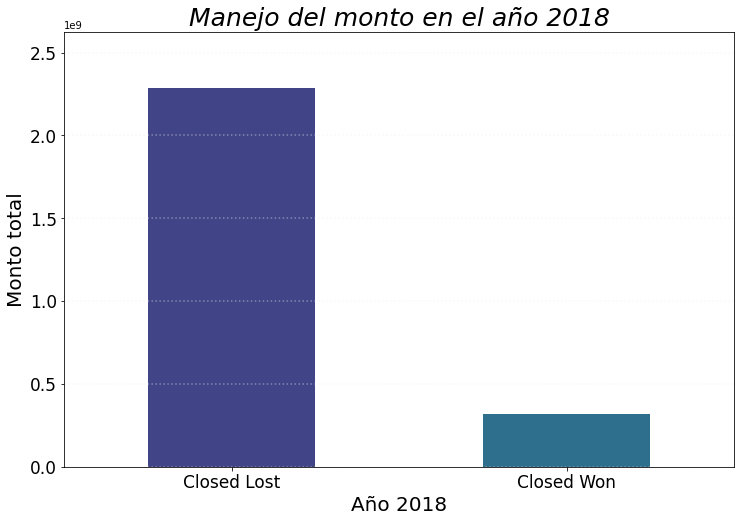

In [466]:
plt.title('Manejo del monto en el año 2018', fontsize=25, fontstyle='oblique')
grafiquito = by_stage_2018['Total_Amount'].plot(kind='bar', figsize=(12,8), rot=360, color=colores, fontsize=17)
ax = plt.gca()
ax.set_ylabel('Monto total',fontsize=20)
ax.set_xlabel('Año 2018', fontsize=20)

lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

### Region

In [467]:
by_region_2018 = df2018.groupby(['Region','Stage']).agg({'Stage':'count'})
by_region_2018 = by_region_2018.unstack()
by_region_2018.columns = ['Closed Lost', 'Closed Won', 'Negotation','Proposal','Qualification']
by_region_2018

,Closed Lost,Closed Won,Negotation,Proposal,Qualification
Region,,,,,
APAC,404.0,614.0,NaN,8.0,3.0
Americas,542.0,699.0,8.0,4.0,NaN
EMEA,693.0,763.0,1.0,2.0,NaN
Japan,97.0,672.0,1.0,14.0,8.0
Middle East,46.0,25.0,8.0,6.0,NaN


In [468]:
by_region_2018 = by_region_2018.loc[:,['Closed Lost', 'Closed Won']]
by_region_2018

,Closed Lost,Closed Won
Region,,
APAC,404.0,614.0
Americas,542.0,699.0
EMEA,693.0,763.0
Japan,97.0,672.0
Middle East,46.0,25.0


Text(0.5, 0, 'Region')

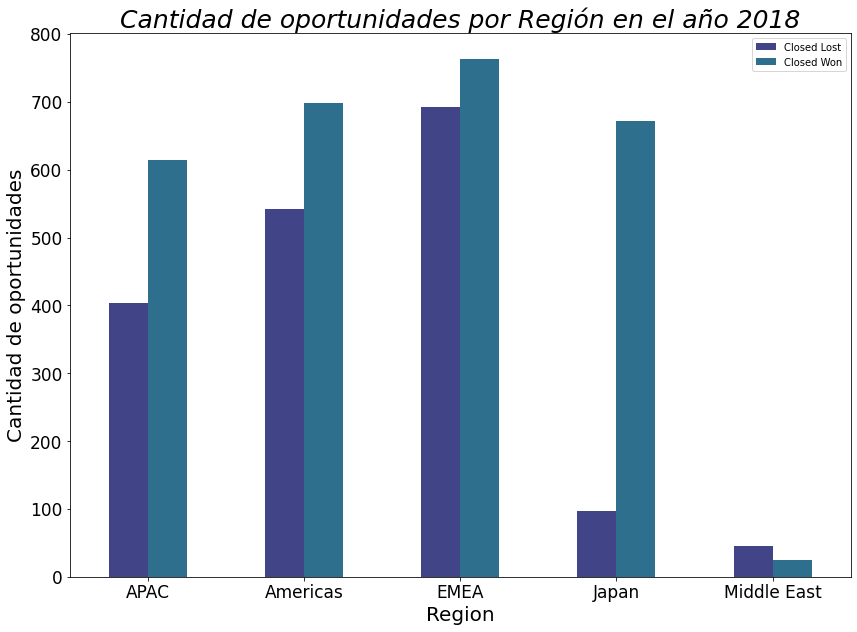

In [469]:
by_region_2018.plot(kind='bar', figsize=(14,10), rot=360, color=colores ,fontsize=17)
plt.title('Cantidad de oportunidades por Región en el año 2018', fontsize=25, fontstyle='oblique')
ax = plt.gca()
ax.set_ylabel('Cantidad de oportunidades',fontsize=20)
ax.set_xlabel('Region', fontsize=20)